In [2]:
#importing the necessary libraries
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import h5py

In [3]:
#reading the images using glob and cv2
img=[cv2.imread(file) for file in glob.glob("*/*.jfif")]
print(len(img))

20


In [4]:
#converting the imported images to rgb as cv2 uses brg as default which causes bluish tint to original image
rgb=[]
for i in img:
    rgb.append(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

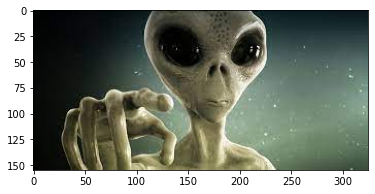

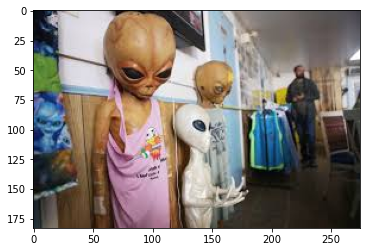

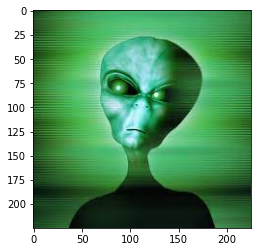

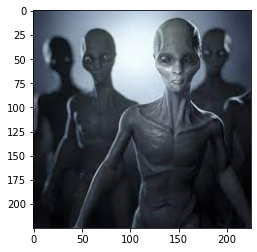

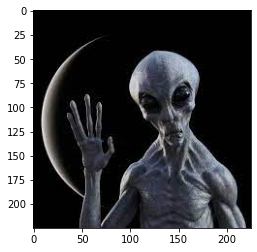

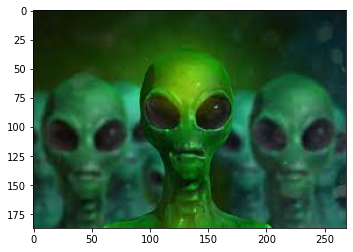

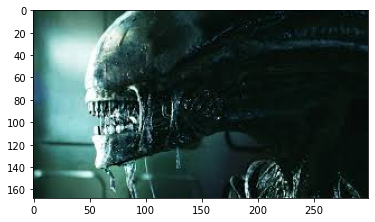

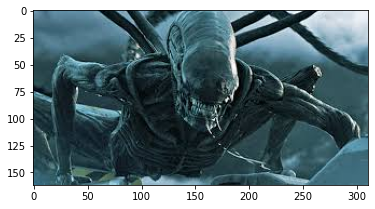

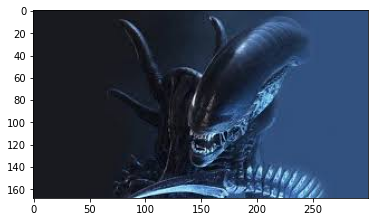

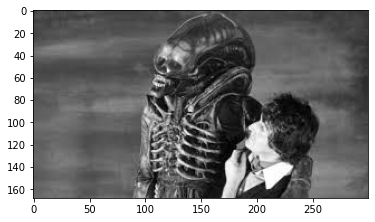

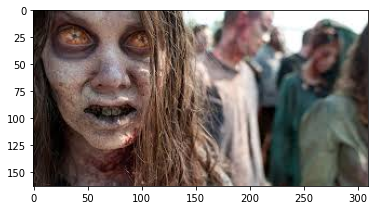

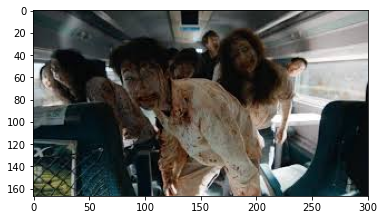

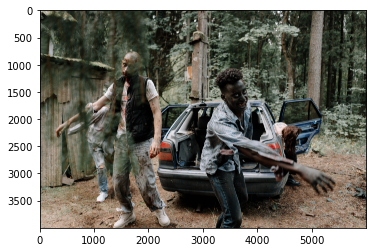

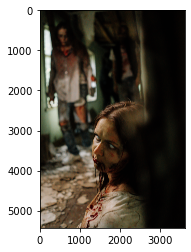

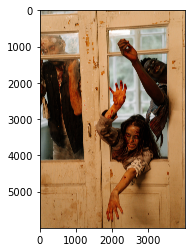

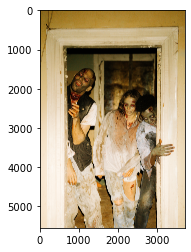

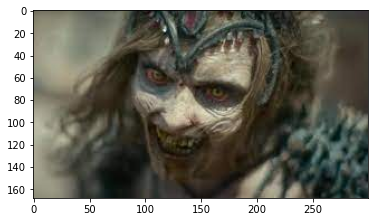

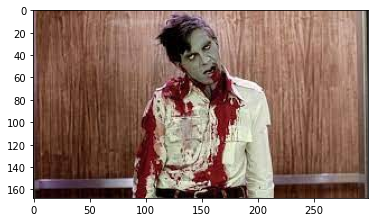

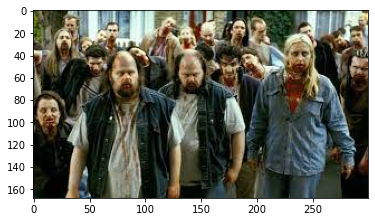

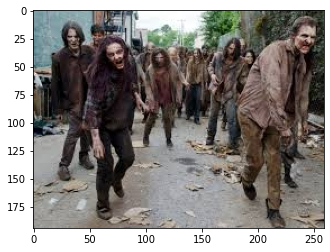

In [5]:
#printing the imported images
for i in rgb:
    plt.imshow(i)
    plt.show()

In [6]:
#STEP 3
#standardize the images into square of ( 300*300 )

resize=[]
for i in rgb:
    dim=(300,300)
    resize.append(cv2.resize(i,dim,interpolation=cv2.INTER_AREA))

In [7]:
print(resize[0].shape)

(300, 300, 3)


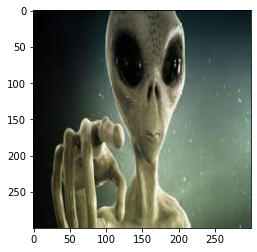

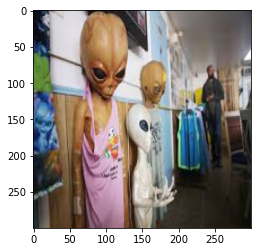

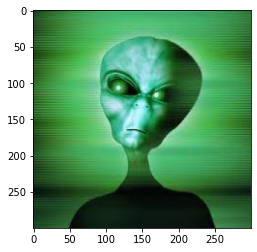

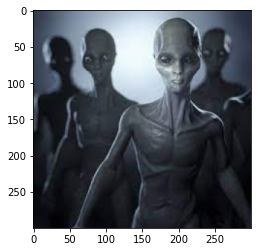

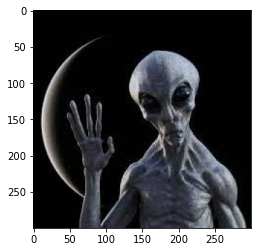

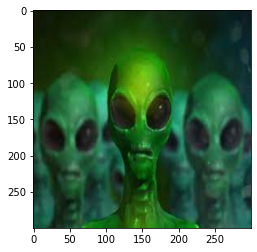

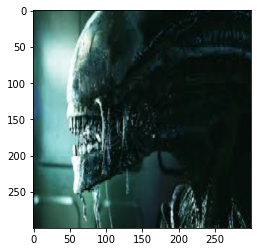

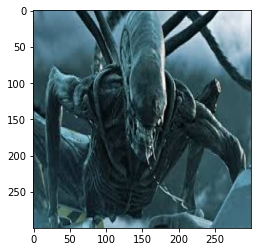

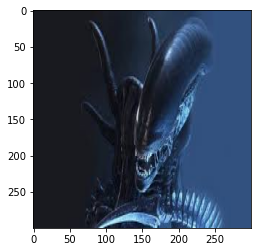

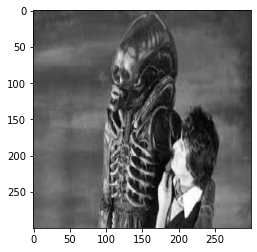

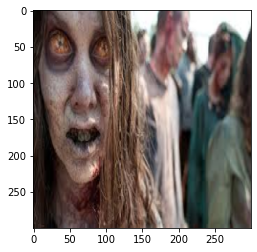

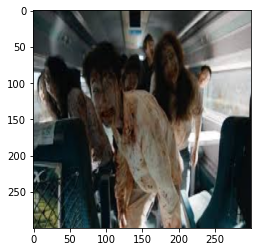

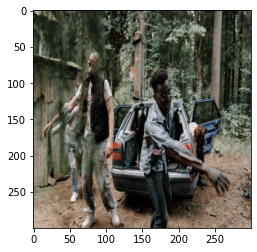

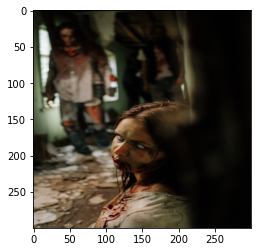

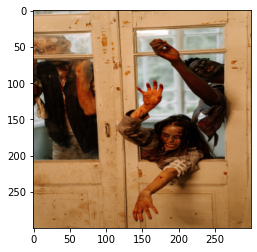

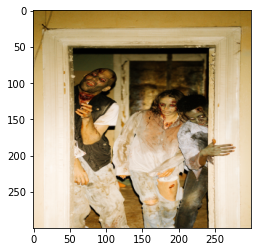

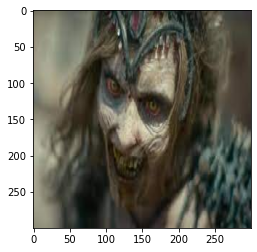

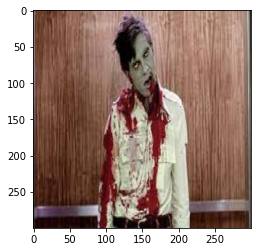

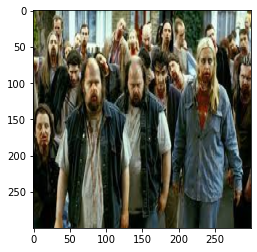

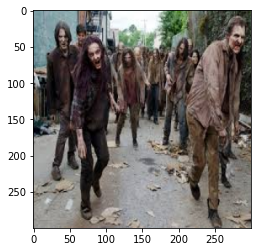

In [8]:
#printing the resized images
for i in resize:
    plt.imshow(i)
    plt.show()

In [9]:
#Step 5
#stacking all the images into an numpy array
stack=np.array(resize,dtype=object)
print(stack)

[[[[1 3 2]
   [1 3 2]
   [1 3 2]
   ...
   [10 23 29]
   [10 23 29]
   [10 23 29]]

  [[1 3 2]
   [1 3 2]
   [1 3 2]
   ...
   [10 23 29]
   [10 23 29]
   [10 23 29]]

  [[1 3 2]
   [1 3 2]
   [1 3 2]
   ...
   [11 24 30]
   [11 24 30]
   [11 24 30]]

  ...

  [[2 2 0]
   [2 2 0]
   [2 2 0]
   ...
   [61 78 60]
   [61 78 60]
   [61 78 60]]

  [[2 2 0]
   [2 2 0]
   [2 2 0]
   ...
   [61 78 60]
   [61 78 60]
   [61 78 60]]

  [[2 2 0]
   [2 2 0]
   [2 2 0]
   ...
   [61 78 60]
   [61 78 60]
   [61 78 60]]]


 [[[5 13 15]
   [6 14 16]
   [8 14 17]
   ...
   [66 65 73]
   [66 65 73]
   [65 64 72]]

  [[5 13 15]
   [6 14 16]
   [8 14 17]
   ...
   [66 65 73]
   [66 65 73]
   [65 64 72]]

  [[5 13 15]
   [6 14 16]
   [8 14 17]
   ...
   [66 65 73]
   [66 65 73]
   [66 65 73]]

  ...

  [[31 46 53]
   [34 49 56]
   [35 48 54]
   ...
   [12 13 8]
   [12 13 8]
   [12 13 8]]

  [[31 47 54]
   [34 49 56]
   [35 49 55]
   ...
   [12 13 8]
   [12 13 8]
   [12 13 8]]

  [[32 47 54]
   [35 50 57]
  

In [10]:
print(len(stack))

20


In [11]:
#Step 6
#here we converted all images into grey, binary and flat

grayy=[]
binr=[]
flatten=[]
for i in resize:
    gray = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
    grayy.append(gray)
    (thresh, blackAndWhiteImage) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)
    binr.append(blackAndWhiteImage)
    flat=i.flatten()
    flatten.append(flat)

In [12]:
#step 7
#saving the dataset in npy format

np.save('npy_gray',grayy)
np.save('npy_binary',binr)
np.save('npy_flatten',flatten)

In [13]:
#saving the dataset in hdf5 format

h5g=h5py.File('hdf5_gray','w')
h5g.create_dataset('hdf5_gray',data=grayy)
h5g.close()

h5b=h5py.File('hdf5_binary','w')
h5b.create_dataset('hdf5_binary',data=binr)
h5b.close()

h5f=h5py.File('hdf5_flatten','w')
h5f.create_dataset('hdf5_flatten',data=flatten)

h5f.close()